# FIFA World Cup Data Analysis (1930 - 2014)

The FIFA World Cup, often simply called the World Cup, is an international association football competition contested by the senior men's national teams of the members of the Fédération Internationale de Football Association (FIFA), the sport's global governing body. The championship has been awarded every four years since the inaugural tournament in 1930, except in 1942 and 1946 when it was not held because of the Second World War. The current champion is France, which won its second title at the 2018 tournament in Russia.

The 21 World Cup tournaments have been won by eight national teams. Brazil have won five times, and they are the only team to have played in every tournament. The other World Cup winners are Germany and Italy, with four titles each; Argentina, France(1998 & 2018), and inaugural winner Uruguay, with two titles each; and England and Spain, with one title each.

In today’s data-driven world it is essential to ﬁnd an optimal, self-explanatory, way to present the data in a way to be able to derive visual patterns that can be mapped to data patterns, in turn, making the data explorable and understandable. Here, I describe an interactive visualization for analyzing football data and identifying patterns, correlations, and insights.

The dataset has been downloaded from [Kaggle Datasets](https://www.kaggle.com/abecklas/fifa-world-cup). The dataset has 3 files named as `WorldCup.csv`, `WorldCupMatch.csv` and `WorldCupPlayer.csv`. For this project 2 files (`WorldCup.csv` and `WorldCupMatch.csv`) are used. The libraries for data analysis and visualization used in this project are Numpy, Pandas, Matplotlib and Seaborn.

In [1]:
project_name = "fifa-data-analysis-project"

In [2]:
!pip install jovian --upgrade --q

# Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import jovian
%matplotlib inline

## Data Preparation and Cleaning

In this step we will perform following process:
 - Analyse the dataset
 - Data Cleaning
 - Find Missing Values

In [4]:
os.listdir()

['.ipynb_checkpoints',
 '.jovianrc',
 'Dataset',
 'fifa-data-analysis-project.ipynb']

> ### Data Analyzing

In [5]:
# Taking all the Players Data
player_data_path = 'Dataset/Fifa World Cup Dataset/WorldCupPlayers.csv'
player_raw_data = pd.read_csv(player_data_path, index_col='Player Name')
player_raw_data

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Position,Event
Player Name,,,,,,,,
Alex THEPOT,201,1096,FRA,CAUDRON Raoul (FRA),S,0,GK,NaN
Oscar BONFIGLIO,201,1096,MEX,LUQUE Juan (MEX),S,0,GK,NaN
Marcel LANGILLER,201,1096,FRA,CAUDRON Raoul (FRA),S,0,NaN,G40'
Juan CARRENO,201,1096,MEX,LUQUE Juan (MEX),S,0,NaN,G70'
Ernest LIBERATI,201,1096,FRA,CAUDRON Raoul (FRA),S,0,NaN,NaN
...,...,...,...,...,...,...,...,...
ALVAREZ,255959,300186501,ARG,SABELLA Alejandro (ARG),N,19,NaN,NaN
KHEDIRA,255959,300186501,GER,LOEW Joachim (GER),N,6,NaN,NaN
AGUERO,255959,300186501,ARG,SABELLA Alejandro (ARG),N,20,NaN,IH46' Y65'


In [6]:
player_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37784 entries, Alex THEPOT to BASANTA
Data columns (total 8 columns):
RoundID          37784 non-null int64
MatchID          37784 non-null int64
Team Initials    37784 non-null object
Coach Name       37784 non-null object
Line-up          37784 non-null object
Shirt Number     37784 non-null int64
Position         4143 non-null object
Event            9069 non-null object
dtypes: int64(3), object(5)
memory usage: 2.6+ MB


In [7]:
# checking for the total MatchId
player_raw_data.drop_duplicates()
player_raw_data.MatchID.nunique()

836

In [8]:
# Taking all the Match Data
match_data_path = 'Dataset/Fifa World Cup Dataset/WorldCupMatches.csv'
match_raw_data = pd.read_csv(match_data_path,index_col='MatchID' , nrows=852)
match_raw_data

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,Home Team Initials,Away Team Initials
MatchID,,,,,,,,,,,,,,,,,,,
1096,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,FRA,MEX
1090,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,USA,BEL
1093,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,YUG,BRA
1098,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,ROU,PER
1085,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300186488,2014,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0,0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0,0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953,NED,CRC
300186474,2014,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1,7,Germany,,58141.0,0,5,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955,BRA,GER
300186490,2014,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0,0,Argentina,Argentina win on penalties (2 - 4),63267.0,0,0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955,NED,ARG


Removing some of the duplicate rows in the dataset.

In [9]:
match_raw_data.drop_duplicates(inplace=True)

In [10]:
match_raw_data.index

Int64Index([     1096,      1090,      1093,      1098,      1085,      1095,
                 1092,      1097,      1099,      1094,
            ...
            300186474, 300186502, 300186501, 300186490, 300186488, 300186504,
            300186508, 300186459, 300186503, 300186497],
           dtype='int64', name='MatchID', length=836)

In [11]:
match_raw_data[match_raw_data['Stage']=='Final'].index

Int64Index([     1087,      1134,      1174,      1278,      1343,      1463,
                 1633,      1765,      2063,      2198,       923,       393,
                   27,      3104,      8788,  43950064,  97410064, 300061509,
            300186501],
           dtype='int64', name='MatchID')

In [12]:
match_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836 entries, 1096 to 300186497
Data columns (total 19 columns):
Year                    836 non-null int64
Datetime                836 non-null object
Stage                   836 non-null object
Stadium                 836 non-null object
City                    836 non-null object
Home Team Name          836 non-null object
Home Team Goals         836 non-null int64
Away Team Goals         836 non-null int64
Away Team Name          836 non-null object
Win conditions          836 non-null object
Attendance              835 non-null float64
Half-time Home Goals    836 non-null int64
Half-time Away Goals    836 non-null int64
Referee                 836 non-null object
Assistant 1             836 non-null object
Assistant 2             836 non-null object
RoundID                 836 non-null int64
Home Team Initials      836 non-null object
Away Team Initials      836 non-null object
dtypes: float64(1), int64(6), object(12)
memory usage: 

In [13]:
match_raw_data.describe()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID
count,836.000000,836.000000,836.000000,835.000000,836.000000,836.000000,8.360000e+02
mean,1984.535885,1.824163,1.021531,44859.457485,0.718900,0.427033,1.086093e+07
std,22.299860,1.619178,1.072024,23551.107893,0.941995,0.675091,2.751802e+07
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02
25%,1970.000000,1.000000,0.000000,29800.000000,0.000000,0.000000,2.620000e+02
50%,1990.000000,2.000000,1.000000,41000.000000,0.000000,0.000000,3.370000e+02
75%,2002.000000,3.000000,2.000000,61009.000000,1.000000,1.000000,2.497220e+05
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07


In [14]:
# Taking all the World Cup Data
world_cup_final = 'Dataset/Fifa World Cup Dataset/WorldCups.csv'
world_cup_final = pd.read_csv(world_cup_final)
world_cup_final

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


In [15]:
world_cup_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
Year              20 non-null int64
Country           20 non-null object
Winner            20 non-null object
Runners-Up        20 non-null object
Third             20 non-null object
Fourth            20 non-null object
GoalsScored       20 non-null int64
QualifiedTeams    20 non-null int64
MatchesPlayed     20 non-null int64
Attendance        20 non-null object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


>## Data Cleaning

In the `world_cups_data` colunm of Attendance is in form of Object so we have to convert it to the int64 form.

In [16]:
world_cup_final['Attendance'] = world_cup_final['Attendance'].apply(lambda x: int("".join(x.split('.'))))

In [17]:
world_cup_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
Year              20 non-null int64
Country           20 non-null object
Winner            20 non-null object
Runners-Up        20 non-null object
Third             20 non-null object
Fourth            20 non-null object
GoalsScored       20 non-null int64
QualifiedTeams    20 non-null int64
MatchesPlayed     20 non-null int64
Attendance        20 non-null int64
dtypes: int64(5), object(5)
memory usage: 1.7+ KB


In [18]:
world_cup_final

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1563135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1603975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1865753


The Datetime column in the `match_raw_data` is str so we have to convert it into a Datetime obj.

In [19]:
type(match_raw_data['Datetime'][1096])

str

In [20]:
match_raw_data['Datetime']

MatchID
1096         13 Jul 1930 - 15:00 
1090         13 Jul 1930 - 15:00 
1093         14 Jul 1930 - 12:45 
1098         14 Jul 1930 - 14:50 
1085         15 Jul 1930 - 16:00 
                     ...         
300186504    05 Jul 2014 - 13:00 
300186508    29 Jun 2014 - 13:00 
300186459    29 Jun 2014 - 17:00 
300186503    01 Jul 2014 - 13:00 
300186497    01 Jul 2014 - 17:00 
Name: Datetime, Length: 836, dtype: object

In [21]:
match_raw_data['Datetime'] = pd.to_datetime(match_raw_data['Datetime'])

In [22]:
match_raw_data['Datetime']

MatchID
1096        1930-07-13 15:00:00
1090        1930-07-13 15:00:00
1093        1930-07-14 12:45:00
1098        1930-07-14 14:50:00
1085        1930-07-15 16:00:00
                    ...        
300186504   2014-07-05 13:00:00
300186508   2014-06-29 13:00:00
300186459   2014-06-29 17:00:00
300186503   2014-07-01 13:00:00
300186497   2014-07-01 17:00:00
Name: Datetime, Length: 836, dtype: datetime64[ns]

In [23]:
match_data = match_raw_data.copy()

___
## Exploratory Analysis and Visualization

In [24]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 6)

### Q.1)  How the Attendance varries from 1930 to 2014

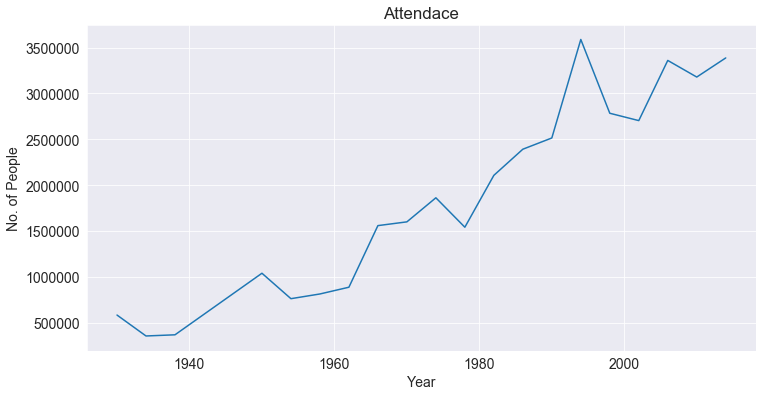

In [25]:
plt.figure(figsize=(12,6))
plt.title('Attendace')
plt.xlabel('Year')
plt.ylabel('No. of People')
plt.plot(world_cup_final['Year'],world_cup_final['Attendance']);

### Q.2)    Which country has the Most Wins in Fifa World cup?

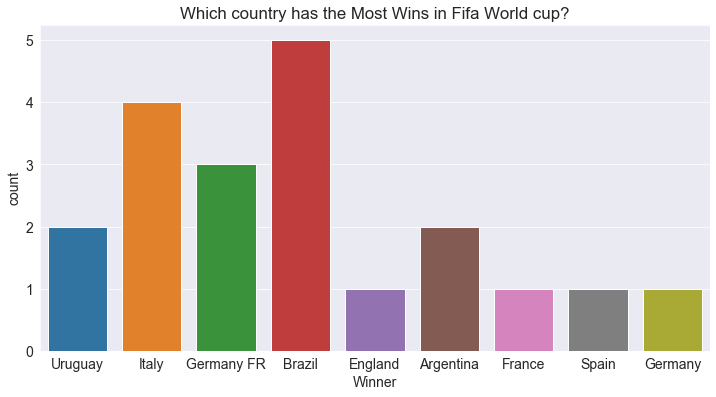

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(data=world_cup_final, x='Winner');
plt.title('Which country has the Most Wins in Fifa World cup?');

### Q.3) Number of matches in each world cup season

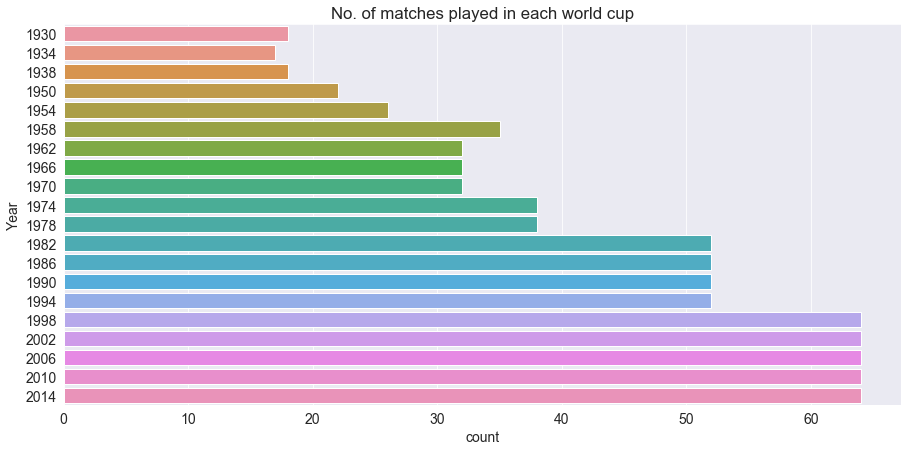

In [27]:
plt.figure(figsize=(15,7))
plt.title('No. of matches played in each world cup')
sns.countplot(data=match_data,y='Year');

### Q.4) In which city most of the matches were hosted in the year 2014?

In [28]:
match_data[match_data['Year']==2014]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,Home Team Initials,Away Team Initials
MatchID,,,,,,,,,,,,,,,,,,,
300186456,2014,2014-06-12 17:00:00,Group A,Arena de Sao Paulo,Sao Paulo,Brazil,3,1,Croatia,,62103.0,1,1,NISHIMURA Yuichi (JPN),SAGARA Toru (JPN),NAGI Toshiyuki (JPN),255931,BRA,CRO
300186492,2014,2014-06-13 13:00:00,Group A,Estadio das Dunas,Natal,Mexico,1,0,Cameroon,,39216.0,0,0,ROLDAN Wilmar (COL),CLAVIJO Humberto (COL),DIAZ Eduardo (COL),255931,MEX,CMR
300186510,2014,2014-06-13 16:00:00,Group B,Arena Fonte Nova,Salvador,Spain,1,5,Netherlands,,48173.0,1,1,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255931,ESP,NED
300186473,2014,2014-06-13 18:00:00,Group B,Arena Pantanal,Cuiaba,Chile,3,1,Australia,,40275.0,2,1,Noumandiez DOUE (CIV),YEO Songuifolo (CIV),BIRUMUSHAHU Jean Claude (BDI),255931,CHI,AUS
300186471,2014,2014-06-14 13:00:00,Group C,Estadio Mineirao,Belo Horizonte,Colombia,3,0,Greece,,57174.0,1,0,GEIGER Mark (USA),HURD Sean (USA),FLETCHER Joe (CAN),255931,COL,GRE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300186504,2014,2014-07-05 13:00:00,Quarter-finals,Estadio Nacional,Brasilia,Argentina,1,0,Belgium,,68551.0,1,0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255953,ARG,BEL
300186508,2014,2014-06-29 13:00:00,Round of 16,Estadio Castelao,Fortaleza,Netherlands,2,1,Mexico,,58817.0,0,0,PROENCA Pedro (POR),MIRANDA Bertino (POR),TRIGO Jose (POR),255951,NED,MEX
300186459,2014,2014-06-29 17:00:00,Round of 16,Arena Pernambuco,Recife,Costa Rica,1,1,Greece,Costa Rica win on penalties (5 - 3),41242.0,0,0,Ben WILLIAMS (AUS),CREAM Matthew (AUS),ANAZ Hakan (AUS),255951,CRC,GRE


In [29]:
match_data[match_data['Year']==2014]['City'].value_counts()

Rio De Janeiro     7
Brasilia           7
Sao Paulo          6
Salvador           6
Belo Horizonte     6
Fortaleza          6
Recife             5
Porto Alegre       5
Curitiba           4
Manaus             4
Natal              4
Cuiaba             4
Name: City, dtype: int64

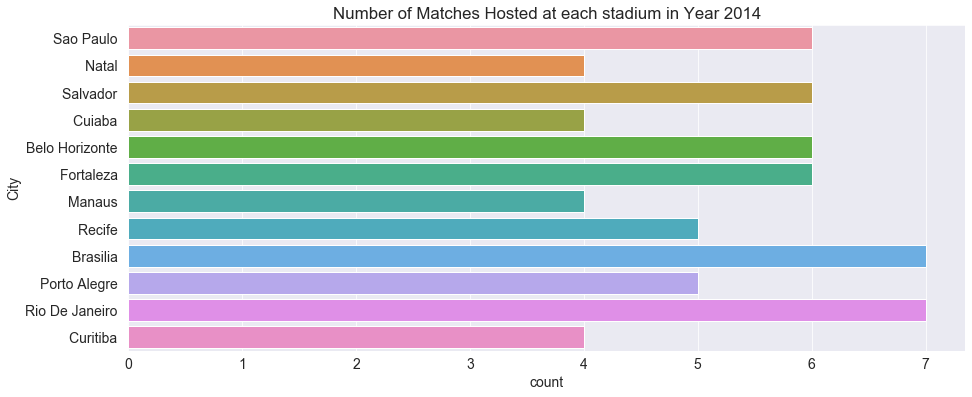

In [30]:
final_data = match_data[match_data['Year']==2014]
plt.figure(figsize=(15,6))
plt.title('Number of Matches Hosted at each stadium in Year 2014')
sns.countplot(data=final_data,y='City');

### Q.5) What is the highest no. of Goals Scored in each World Cup since 1930?

In [31]:
world_cup_final.sort_values('GoalsScored',ascending=False)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
19,2014,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3386810
15,1998,France,France,Brazil,Croatia,Netherlands,171,32,64,2785100
16,2002,Korea/Japan,Brazil,Germany,Turkey,Korea Republic,161,32,64,2705197
17,2006,Germany,Italy,France,Germany,Portugal,147,32,64,3359439
11,1982,Spain,Italy,Germany FR,Poland,France,146,24,52,2109723
18,2010,South Africa,Spain,Netherlands,Germany,Uruguay,145,32,64,3178856
14,1994,USA,Brazil,Italy,Sweden,Bulgaria,141,24,52,3587538
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607
12,1986,Mexico,Argentina,Germany FR,France,Belgium,132,24,52,2394031
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819810


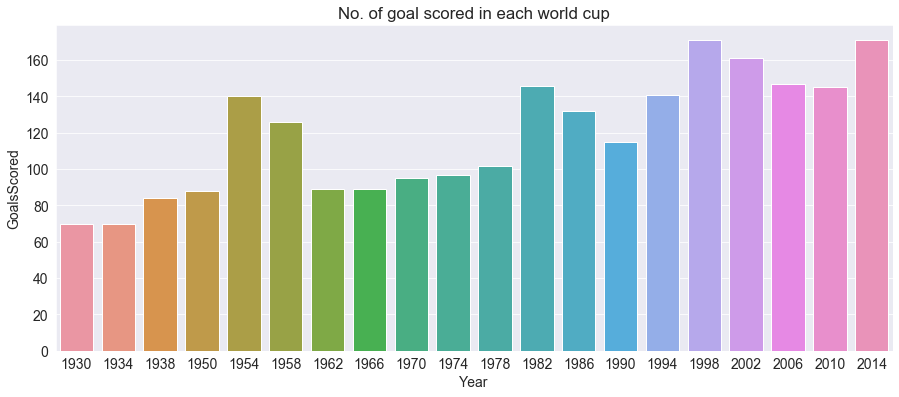

In [32]:
plt.figure(figsize=(15,6))
plt.title('No. of goal scored in each world cup')
sns.barplot(data=world_cup_final, x='Year', y='GoalsScored');

___
## Asking and Answering Questions

### Q.1) Which team has won most of the matches at home in 2014?

First we will make a new column called `Winner` in which we decide which team has won the game(Home Team/Away Team/Tie).

In the following function we have performed analysis for the game which was ended by `Penalties`:

In [33]:
def penalty_func(x):
    temp = re.findall('\d',x)
    int_value = [int(i) for i in temp]
    if int_value[0] > int_value[1]:
        return 'Home Team Wins'
    return 'Away Team Wins'

Following cell is used to calculate the `Home/Away/Tie` team win for the particular match.

In [34]:
home_team_goals = list(match_data['Home Team Goals'])
away_team_goals = list(match_data['Away Team Goals'])
win_condition = list(match_data['Win conditions'])
res=[]
for i in range(len(home_team_goals)):
    if(home_team_goals[i] > away_team_goals[i]):
        res.append('Home Team Wins')
    elif(home_team_goals[i]< away_team_goals[i]):
        res.append('Away Team Wins')
    elif(win_condition[i]!=' '):
        res.append(penalty_func(win_condition[i]))
    else:
        res.append('Tie')

In [35]:
len(res)

836

In [36]:
match_data['Winner'] = res

The cell below is used to show to matches where home team wins:

In [37]:
match_data.loc[match_data['Winner']=='Home Team Wins']

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,Home Team Initials,Away Team Initials,Winner
MatchID,,,,,,,,,,,,,,,,,,,,
1096,1930,1930-07-13 15:00:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,FRA,MEX,Home Team Wins
1090,1930,1930-07-13 15:00:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,USA,BEL,Home Team Wins
1093,1930,1930-07-14 12:45:00,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,YUG,BRA,Home Team Wins
1098,1930,1930-07-14 14:50:00,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,ROU,PER,Home Team Wins
1085,1930,1930-07-15 16:00:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,ARG,FRA,Home Team Wins
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300186504,2014,2014-07-05 13:00:00,Quarter-finals,Estadio Nacional,Brasilia,Argentina,1,0,Belgium,,68551.0,1,0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255953,ARG,BEL,Home Team Wins
300186508,2014,2014-06-29 13:00:00,Round of 16,Estadio Castelao,Fortaleza,Netherlands,2,1,Mexico,,58817.0,0,0,PROENCA Pedro (POR),MIRANDA Bertino (POR),TRIGO Jose (POR),255951,NED,MEX,Home Team Wins
300186459,2014,2014-06-29 17:00:00,Round of 16,Arena Pernambuco,Recife,Costa Rica,1,1,Greece,Costa Rica win on penalties (5 - 3),41242.0,0,0,Ben WILLIAMS (AUS),CREAM Matthew (AUS),ANAZ Hakan (AUS),255951,CRC,GRE,Home Team Wins


In [38]:
match_data.iloc[1]['Home Team Name']

'USA'

In [39]:
# This cell used for calulating the matches held in 2014 and won by home team
match_data[(match_data['Year']==2014) & (match_data['Winner']=='Home Team Wins')]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,Home Team Initials,Away Team Initials,Winner
MatchID,,,,,,,,,,,,,,,,,,,,
300186456,2014,2014-06-12 17:00:00,Group A,Arena de Sao Paulo,Sao Paulo,Brazil,3,1,Croatia,,62103.0,1,1,NISHIMURA Yuichi (JPN),SAGARA Toru (JPN),NAGI Toshiyuki (JPN),255931,BRA,CRO,Home Team Wins
300186492,2014,2014-06-13 13:00:00,Group A,Estadio das Dunas,Natal,Mexico,1,0,Cameroon,,39216.0,0,0,ROLDAN Wilmar (COL),CLAVIJO Humberto (COL),DIAZ Eduardo (COL),255931,MEX,CMR,Home Team Wins
300186473,2014,2014-06-13 18:00:00,Group B,Arena Pantanal,Cuiaba,Chile,3,1,Australia,,40275.0,2,1,Noumandiez DOUE (CIV),YEO Songuifolo (CIV),BIRUMUSHAHU Jean Claude (BDI),255931,CHI,AUS,Home Team Wins
300186471,2014,2014-06-14 13:00:00,Group C,Estadio Mineirao,Belo Horizonte,Colombia,3,0,Greece,,57174.0,1,0,GEIGER Mark (USA),HURD Sean (USA),FLETCHER Joe (CAN),255931,COL,GRE,Home Team Wins
300186507,2014,2014-06-14 22:00:00,Group C,Arena Pernambuco,Recife,C�te d'Ivoire,2,1,Japan,,40267.0,0,1,OSSES Enrique (CHI),ASTROZA Carlos (CHI),ROMAN Sergio (CHI),255931,CIV,JPN,Home Team Wins
300186494,2014,2014-06-15 13:00:00,Group E,Estadio Nacional,Brasilia,Switzerland,2,1,Ecuador,,68351.0,0,1,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255931,SUI,ECU,Home Team Wins
300186496,2014,2014-06-15 16:00:00,Group E,Estadio Beira-Rio,Porto Alegre,France,3,0,Honduras,,43012.0,1,0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),255931,FRA,HON,Home Team Wins
300186477,2014,2014-06-15 19:00:00,Group F,Estadio do Maracana,Rio De Janeiro,Argentina,2,1,"rn"">Bosnia and Herzegovina",,74738.0,1,0,AGUILAR Joel (SLV),TORRES William (SLV),ZUMBA Juan (SLV),255931,ARG,BIH,Home Team Wins
300186475,2014,2014-06-16 13:00:00,Group G,Arena Fonte Nova,Salvador,Germany,4,0,Portugal,,51081.0,3,0,MAZIC Milorad (SRB),RISTIC Milovan (SRB),DJURDJEVIC Dalibor (SRB),255931,GER,POR,Home Team Wins


C:\Users\tprat\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tprat\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


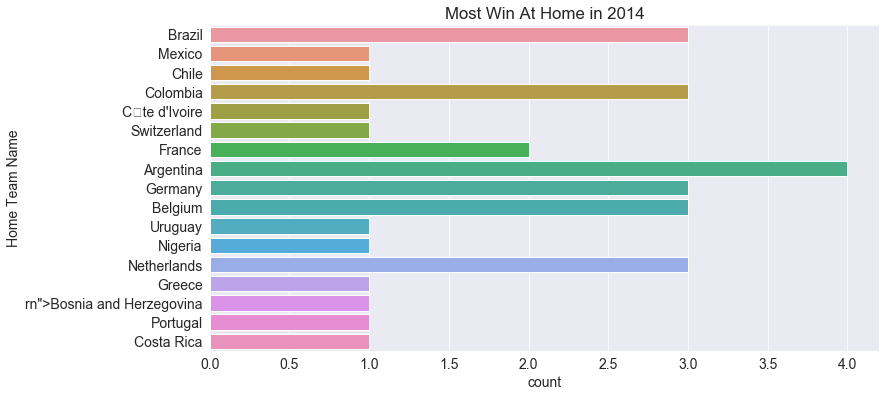

In [40]:
home_win = match_data[(match_data['Year']==2014) & (match_data['Winner']=='Home Team Wins')]
sns.countplot(data=home_win,y='Home Team Name');
plt.title('Most Win At Home in 2014');

### Q.2) Till now how many matches ended with `Penalties`?

The method `match_data[match_data['Win conditions']!=' ']['Win conditions'].str.contains(pat = 'penalties')` in which the first block i.e `match_data['Win conditions']!=' ']['Win conditions']` will check for the `win condition` which is not empty and 2nd block i.e  `.str.contains(pat = 'penalties')` will check for the word `penalties` in the `win condition` column.

In [41]:
tie_res = match_data[match_data['Win conditions']!=' ']['Win conditions'].str.contains(pat = 'penalties')
penalties =match_data[match_data['Win conditions']!=' ']['Win conditions'].loc[tie_res]
penalties

MatchID
914                              win on penalties (5 - 4) 
440                       France win on penalties (3 - 4) 
575                   Germany FR win on penalties (4 - 1) 
421                      Belgium win on penalties (4 - 5) 
248          Republic of Ireland win on penalties (5 - 4) 
31                               win on penalties (2 - 3) 
28                               win on penalties (3 - 4) 
159                              win on penalties (4 - 3) 
3092                    Bulgaria win on penalties (1 - 3) 
3095                      Sweden win on penalties (4 - 5) 
3104                      Brazil win on penalties (3 - 2) 
8779                   Argentina win on penalties (4 - 3) 
8781                      France win on penalties (3 - 4) 
8785                      Brazil win on penalties (4 - 2) 
43950052                   Spain win on penalties (3 - 2) 
43950059          Korea Republic win on penalties (3 - 5) 
97410054                 Ukraine win on penaltie

In [42]:
penalties.nunique()

24

There are `24` matches were ended with penalties from 1930 to 2014.

And the matches are as follows:

In [43]:
match_data.loc[penalties.index]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,Home Team Initials,Away Team Initials,Winner
MatchID,,,,,,,,,,,,,,,,,,,,
914,1982,1982-07-08 21:00:00,Semi-finals,Ramon Sanchez Pizjuan,Seville,Germany FR,3,3,France,win on penalties (5 - 4),70000.0,0,0,CORVER Charles (NED),GALLER Bruno (SUI),VALENTINE Robert (SCO),295,FRG,FRA,Home Team Wins
440,1986,1986-06-21 12:00:00,Quarter-finals,Jalisco,Guadalajara,Brazil,1,1,France,France win on penalties (3 - 4),65000.0,0,0,IGNA Ioan (ROU),NEMETH Lajos (HUN),CHRISTOV Vojtech (TCH),714,BRA,FRA,Away Team Wins
575,1986,1986-06-21 16:00:00,Quarter-finals,Estadio Universitario,Monterrey,Germany FR,0,0,Mexico,Germany FR win on penalties (4 - 1),41700.0,0,0,DIAZ PALACIO Jesus (COL),BAMBRIDGE Christopher (AUS),SNODDY Alan (NIR),714,FRG,MEX,Home Team Wins
421,1986,1986-06-22 16:00:00,Quarter-finals,Cuauhtemoc,Puebla,Spain,1,1,Belgium,Belgium win on penalties (4 - 5),45000.0,0,0,KIRSCHEN Siegfried (GER),CODESAL MENDEZ Edgardo (MEX),BRUMMEIER Horst (AUT),714,ESP,BEL,Away Team Wins
248,1990,1990-06-25 17:00:00,Round of 16,Luigi Ferraris,Genoa,"rn"">Republic of Ireland",0,0,Romania,Republic of Ireland win on penalties (5 - 4),31818.0,0,0,RAMIZ WRIGHT Jose (BRA),MACIEL Carlos (PAR),MANDI Jassim (BHR),323,IRL,ROU,Home Team Wins
31,1990,1990-06-30 17:00:00,Quarter-finals,Comunale,Florence,Yugoslavia,0,0,Argentina,win on penalties (2 - 3),38971.0,0,0,ROETHLISBERGER Kurt (SUI),JOUINI Neji (TUN),HANSAL Mohamed (ALG),751,YUG,ARG,Away Team Wins
28,1990,1990-07-03 20:00:00,Semi-finals,San Paolo,Naples,Italy,1,1,Argentina,win on penalties (3 - 4),59978.0,0,0,VAUTROT Michel (FRA),LISTKIEWICZ Michal (POL),MIKKELSEN Peter (DEN),3464,ITA,ARG,Away Team Wins
159,1990,1990-07-04 20:00:00,Semi-finals,Stadio delle Alpi,Turin,Germany FR,1,1,England,win on penalties (4 - 3),62628.0,0,0,RAMIZ WRIGHT Jose (BRA),QUINIOU Joel (FRA),PEREZ HOYOS Armando (COL),3464,FRG,ENG,Home Team Wins
3092,1994,1994-07-05 16:30:00,Round of 16,Giants Stadium,New York/New Jersey,Mexico,1,1,Bulgaria,Bulgaria win on penalties (1 - 3),71030.0,0,0,AL SHARIF Jamal (SYR),FANAEI Mohammad (IRN),AL GHATTAN Yousif Abdulla (BAH),338,MEX,BUL,Away Team Wins


### Q.3) In which year the highest `Attendance` was recorded?

In [44]:
match_data.sort_values('Attendance',ascending=False)[['Year','Home Team Name','Away Team Name','Attendance']]

,Year,Home Team Name,Away Team Name,Attendance
MatchID,,,,
1190,1950,Uruguay,Brazil,173850.0
1186,1950,Brazil,Spain,152772.0
1191,1950,Brazil,Yugoslavia,142429.0
1189,1950,Brazil,Sweden,138886.0
393,1986,Argentina,Germany FR,114600.0
...,...,...,...,...
1129,1934,Germany,Sweden,3000.0
1408,1958,Wales,Hungary,2823.0
1098,1930,Romania,Peru,2549.0


In [45]:
max_attendance = match_data.sort_values('Attendance',ascending=False)[['Home Team Name','Away Team Name','Attendance']]

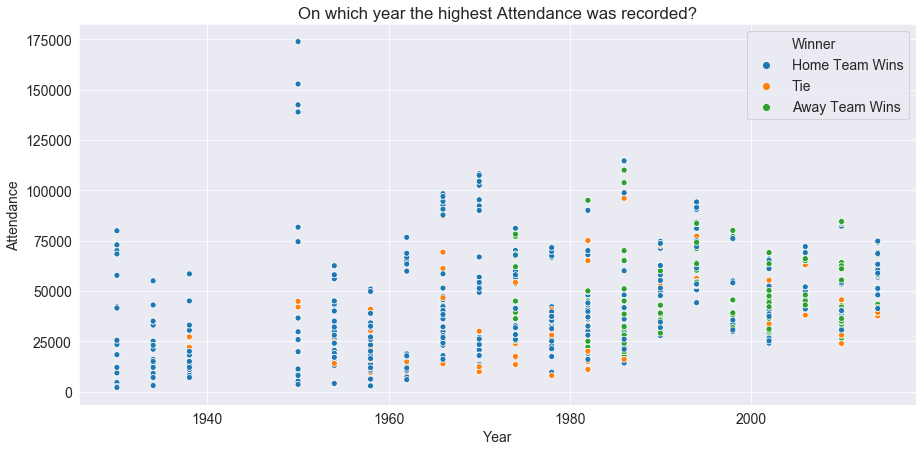

In [46]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=match_data, x='Year', y='Attendance', hue='Winner');
plt.title('On which year the highest Attendance was recorded?');

### Q.4) What is the mostly observed Win Type (Home/ Away/ Tie) since 1930?

In [51]:
match_data['Winner'].value_counts()

Home Team Wins    494
Away Team Wins    182
Tie               160
Name: Winner, dtype: int64

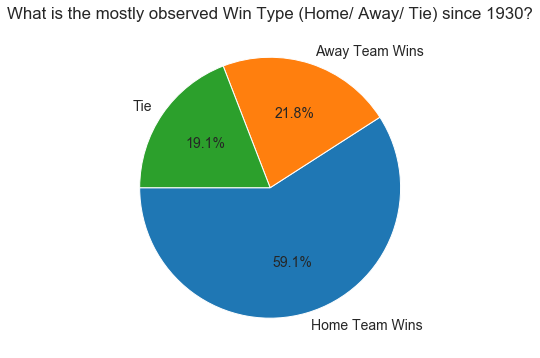

In [60]:
win_type = match_data['Winner'].value_counts()
plt.title('What is the mostly observed Win Type (Home/ Away/ Tie) since 1930?')
plt.pie(win_type, labels=win_type.index, autopct='%1.1f%%', startangle=180);

The Pie Chart illustrates that the majority of the matches won by the `Home Team`.

### Q.5) Top 10 countries which have won most of the games since 1930.

The following cell will check for the Home/Away/Tie team win and will set the winnig country name to the new column called `Winning Team`:

In [61]:
winner_list = list(match_data['Winner'])
home_team_name = list(match_data['Home Team Name'])
away_team_name = list(match_data['Away Team Name'])
result=[]
for i in range(len(winner_list)):
    if( winner_list[i] == 'Home Team Wins' ):
        result.append(home_team_name[i])
    elif( winner_list[i] == 'Away Team Wins'):
        result.append(away_team_name[i])
    else:
        result.append('Tie')

In [62]:
len(result)

836

In [63]:
match_data['Winning Team'] = result

In [64]:
match_data

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,Home Team Initials,Away Team Initials,Winner,Winning Team
MatchID,,,,,,,,,,,,,,,,,,,,,
1096,1930,1930-07-13 15:00:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,...,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,FRA,MEX,Home Team Wins,France
1090,1930,1930-07-13 15:00:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,...,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,USA,BEL,Home Team Wins,USA
1093,1930,1930-07-14 12:45:00,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,...,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,YUG,BRA,Home Team Wins,Yugoslavia
1098,1930,1930-07-14 14:50:00,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,...,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,ROU,PER,Home Team Wins,Romania
1085,1930,1930-07-15 16:00:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,...,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,ARG,FRA,Home Team Wins,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300186504,2014,2014-07-05 13:00:00,Quarter-finals,Estadio Nacional,Brasilia,Argentina,1,0,Belgium,,...,1,0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255953,ARG,BEL,Home Team Wins,Argentina
300186508,2014,2014-06-29 13:00:00,Round of 16,Estadio Castelao,Fortaleza,Netherlands,2,1,Mexico,,...,0,0,PROENCA Pedro (POR),MIRANDA Bertino (POR),TRIGO Jose (POR),255951,NED,MEX,Home Team Wins,Netherlands
300186459,2014,2014-06-29 17:00:00,Round of 16,Arena Pernambuco,Recife,Costa Rica,1,1,Greece,Costa Rica win on penalties (5 - 3),...,0,0,Ben WILLIAMS (AUS),CREAM Matthew (AUS),ANAZ Hakan (AUS),255951,CRC,GRE,Home Team Wins,Costa Rica


In [65]:
match_data['Winning Team'].value_counts()

Tie               160
Brazil             73
Argentina          46
Italy              46
Germany FR         39
                 ... 
Tunisia             1
Wales               1
Cuba                1
Czech Republic      1
Slovenia            1
Name: Winning Team, Length: 65, dtype: int64

Here the extra parameter `Tie` has came so we have to remove it.

In [66]:
temp = match_data.where(~(match_data['Winning Team']=='Tie'),np.nan,inplace=False)

In [67]:
temp['Winning Team'].value_counts().head(10)

Brazil         73
Argentina      46
Italy          46
Germany FR     39
Germany        31
Spain          30
France         30
Netherlands    28
England        26
Uruguay        21
Name: Winning Team, dtype: int64

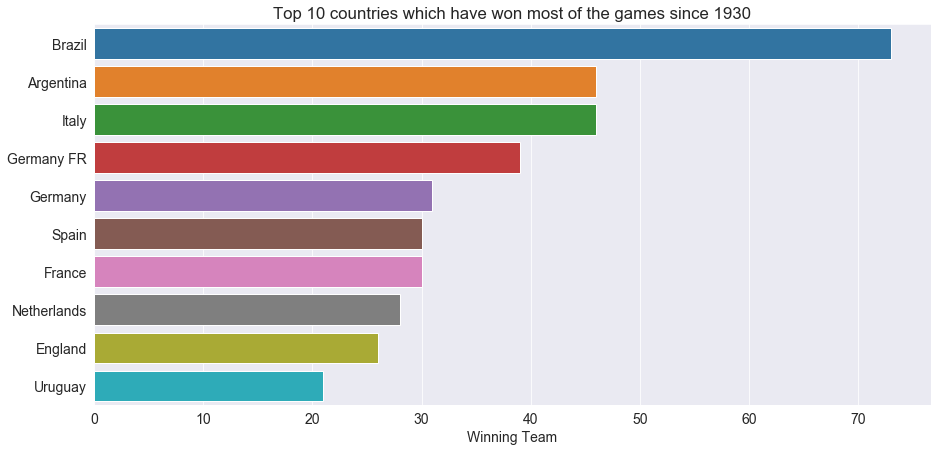

In [68]:
teams = temp['Winning Team'].value_counts().head(10)
plt.figure(figsize=(15,7))
plt.title('Top 10 countries which have won most of the games since 1930');
sns.barplot(teams,teams.index);

### Q.6) Which country has won most of the matches in `Penalties`?

Total Matches with `Penalties`:

In [69]:
penalty_matches = match_data[(match_data['Win conditions']!= ' ')  & ( match_data['Win conditions'].str.contains(pat = 'penalties'))]

In [70]:
penalty_matches['Winning Team'].value_counts()

Argentina                  4
Brazil                     3
Germany FR                 3
France                     2
Bulgaria                   1
Netherlands                1
Italy                      1
Korea Republic             1
Paraguay                   1
Belgium                    1
Germany                    1
Uruguay                    1
rn">Republic of Ireland    1
Ukraine                    1
Spain                      1
Costa Rica                 1
Portugal                   1
Sweden                     1
Name: Winning Team, dtype: int64

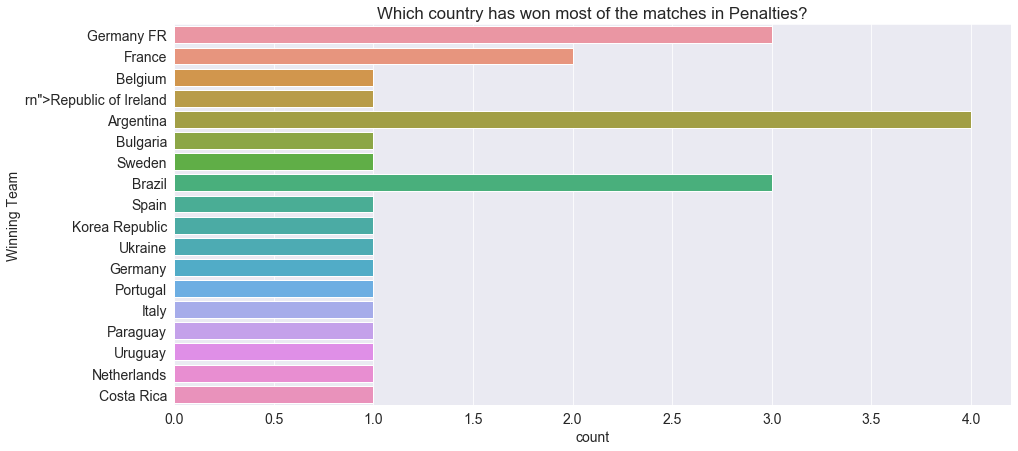

In [71]:
plt.figure(figsize=(15,7));
plt.title('Which country has won most of the matches in Penalties?');
sns.countplot(data=penalty_matches,y='Winning Team');

_____
## Summary

### The above data analysis can be summarised as follows:
In the Exploratory Analysis Section I have observed:
- How the attendance varries from year 1930 to 2014.
- `Brazil` is having most win in the fifa world cup final.
- Total number of matches played in each world cup, which is `64` from 2006 to 2014.
- Also highest no. of goal scored in wach world cup since 1930 was `171` in 1998 and 2014 world cup.

In the Asking and Answering Section I have observed:
- `Argentina` wins most of the games at home.
- Uptil 2014 there are `24` matches were ended with penalties.
- The highest attendance was recorded in Year `1950`  which was `173850` and the match was between `Uruguay vs. Brazil`.
- From the pie chart it is observed that the majority of matches won by `Home Team` with `59.1%`, nearly `21.8%` matches are won by `Away Team` and `19.1%`  matches `Tied`.
- `Brazil` is the country who has won most of the games since 1930 with a count of `73`.
- `Argentina` has won most penalties(4).

_____
## References and Future Work

### Future Work

We have taken only the dataset for the world cup. But we have another dataset named as `WorldCupPlayer.csv`. Only `WorldCups.csv` and `WorldCupMatch.csv` is taken under consideration for this project. For data realted to Goal Scored by the individual player and total saves by the individual player can be retrived from the `WorldCupPlayer.csv` dataset. Moreover this dataset can be combined with the `WorldCupMatch.csv` dataset with help of `MatchId`, so that interesting data can be explored.

### References

Following are the references:

- ZerotoPandas Tutorial by JovianML: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas
- Numpy Documentation: https://numpy.org/devdocs/user/quickstart.html
- User guide for Pandas: https://pandas.pydata.org/docs/user_guide/index.html
- Seaborn gallery: https://seaborn.pydata.org/examples/index.html
- Matplotlib gallery: https://matplotlib.org/3.1.1/gallery/index.html 
- Fifa World Cup Dataset: https://www.kaggle.com/abecklas/fifa-world-cup

In [73]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "tpratik345/fifa-data-analysis-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/tpratik345/fifa-data-analysis-project


'https://jovian.ml/tpratik345/fifa-data-analysis-project'